1. IMPORTAR LAS LIBRERIAS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

2. LEEMOS EL CSV

In [2]:
df_available = pd.read_csv("attrition_availabledata_03.csv")

3. CALCULAMOS EL NUMERO DE VARIABLES E INSTANCIAS

In [3]:
print("\n🔹 Número de instancias y variables:")
print(f"Filas: {df_available.shape[0]}, Columnas: {df_available.shape[1]}")


🔹 Número de instancias y variables:
Filas: 2940, Columnas: 31


4. IDENTIFICAMOS TODOS LOS TIPOS DE VARIABLES, (Categóricas, numéricas y ordinales)

In [4]:
categorical_cols = df_available.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df_available.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\n🔹 Variables categóricas:", categorical_cols)
print("\n🔹 Nº variables categóricas: " , len(categorical_cols))
print("🔹 Variables numéricas:", numerical_cols)
print("\n🔹 Nº variables numéricas: " , len(numerical_cols))


🔹 Variables categóricas: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'Attrition']

🔹 Nº variables categóricas:  8
🔹 Variables numéricas: ['hrs', 'absences', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

🔹 Nº variables numéricas:  23


5. CLASIFICAMOS TODAS LAS VARIABLES SEGUN LA CARDINALIDAD
    Consideraremos alta cardinalidad variables con más de 5 posibles valores

In [5]:
high_cardinality_cols = [col for col in categorical_cols if df_available[col].nunique() > 5]
print("\n🔹 Variables categóricas con alta cardinalidad:", high_cardinality_cols)


🔹 Variables categóricas con alta cardinalidad: ['EducationField', 'JobRole']


6. IDENTIFICAMOS LOS QUE TIENEN VALOR NULO

In [ ]:
missing_values = df_available.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("\n🔹 Valores nulos por columna:")
print(missing_values)


🔹 Valores nulos por columna:
EnvironmentSatisfaction    15
JobSatisfaction            12
WorkLifeBalance            21
NumCompaniesWorked         13
TotalWorkingYears           6
dtype: int64


7. DETECTAMOS LAS COLUMNAS CONSTANTES DE UN SOLO VALOR

In [7]:
constant_cols = [col for col in df_available.columns if df_available[col].nunique() == 1]
print("\n🔹 Columnas constantes (sin variabilidad):", constant_cols)


🔹 Columnas constantes (sin variabilidad): ['EmployeeCount', 'Over18', 'StandardHours']


8. DETECTAMOS LAS COLUMNAS BINARIAS

In [8]:
binary_cols = [col for col in df_available.columns if df_available[col].nunique() == 2]
print("\n🔹 Columnas binarias:", binary_cols)


🔹 Columnas binarias: ['PerformanceRating', 'Gender', 'Attrition']


9. IDENTIFICAMOS AQUELLAS COLUMNAS QUE SON DE IDENTIFICACIÓN

In [9]:
id_cols = [col for col in df_available.columns if "ID" in col or "id" in col or "EmployeeCount" in col]
print("\n🔹 Posibles columnas de ID:", id_cols)


🔹 Posibles columnas de ID: ['EmployeeCount', 'EmployeeID']


10. ANALISAS DEL DESBALANCEO DE LA VARIABLE OBJETIVO


🔹 Es un problema de CLASIFICACIÓN.

🔹 Distribución de la variable objetivo (absences):
Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


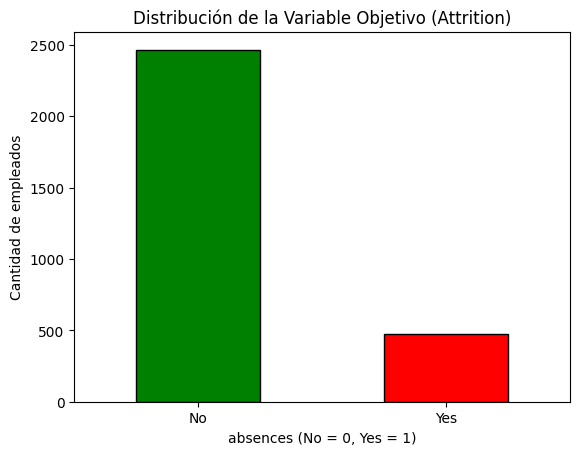

In [11]:
#primero hacemos un análisis del tipo de problema con el que estamos tratando
target_col = "Attrition"
if df_available[target_col].dtype == 'object' or df_available[target_col].nunique() <= 10:
    print("\n🔹 Es un problema de CLASIFICACIÓN.")
else:
    print("\n🔹 Es un problema de REGRESIÓN.")

#A continuación, si es un problema de clasificación hacemos un análisis del desbalanceo de la variable objetivo
attrition_distribution = df_available[target_col].value_counts(normalize=True) * 100
print("\n🔹 Distribución de la variable objetivo (absences):")
print(attrition_distribution)

#Generamos la visualización del desbalanceo
df_available["Attrition"].value_counts().plot(kind='bar', color=['green', 'red'], edgecolor="black")
plt.title("Distribución de la Variable Objetivo (Attrition)")
plt.ylabel("Cantidad de empleados")
plt.xlabel("absences (No = 0, Yes = 1)")
plt.xticks(rotation=0)
plt.show()

Conclusiones: Se puede ver que hay un gran desbalanceo de clases de hasta 5 veces menos instancias para el valor "Yes"